In [1]:
import os
import gc

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib. pyplot as plt
from collections import defaultdict

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

path='/content/drive/My Drive/Colab Notebooks/crime_prediction'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
file_path=os.path.join(path,'data','CLEAR.csv')

In [3]:
file=pd.read_csv(file_path,sep=',',parse_dates=['Date'])

In [4]:
file['Date']=pd.to_datetime(file['Date'].dt.strftime('%Y-%m-%d'))

In [5]:
file

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Latitude,Longitude
0,2001-01-01,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,41.764002,-87.656290
1,2001-01-01,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,41.862175,-87.711496
2,2001-01-01,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,APARTMENT,False,False,41.804197,-87.626096
3,2001-01-01,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,41.812451,-87.694479
4,2001-01-01,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,41.963238,-87.778194
...,...,...,...,...,...,...,...,...
6472799,2020-07-08,THEFT,RETAIL THEFT,GROCERY FOOD STORE,False,False,41.954344,-87.664922
6472800,2020-07-08,THEFT,OVER $500,RESIDENCE,False,False,41.754333,-87.613790
6472801,2020-07-08,ROBBERY,AGGRAVATED,STREET,False,False,41.795364,-87.599238
6472802,2020-07-08,DECEPTIVE PRACTICE,COMPUTER FRAUD,CONVENIENCE STORE,False,False,41.953853,-87.713208


In [6]:
location={
    'Longitude': file.loc[:,'Longitude'],
    'Latitude': file.loc[:,'Latitude']
         }

In [7]:
location=pd.DataFrame(location)

In [8]:
location

,Longitude,Latitude
0,-87.656290,41.764002
1,-87.711496,41.862175
2,-87.626096,41.804197
3,-87.694479,41.812451
4,-87.778194,41.963238
...,...,...
6472799,-87.664922,41.954344
6472800,-87.613790,41.754333
6472801,-87.599238,41.795364
6472802,-87.713208,41.953853


In [9]:
#Fit the data.
kmeans = KMeans(n_clusters=6)
kmeans.fit(location)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
#Learn the labels.
labels = kmeans.predict(location)
centroids = kmeans.cluster_centers_

In [11]:
file['Zone']=list(labels) #Insert new dictinary key zone, where longitude,latitude map to zone using k-means

In [12]:
file

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Latitude,Longitude,Zone
0,2001-01-01,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,41.764002,-87.656290,3
1,2001-01-01,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,41.862175,-87.711496,2
2,2001-01-01,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,APARTMENT,False,False,41.804197,-87.626096,3
3,2001-01-01,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,41.812451,-87.694479,3
4,2001-01-01,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,41.963238,-87.778194,2
...,...,...,...,...,...,...,...,...,...
6472799,2020-07-08,THEFT,RETAIL THEFT,GROCERY FOOD STORE,False,False,41.954344,-87.664922,0
6472800,2020-07-08,THEFT,OVER $500,RESIDENCE,False,False,41.754333,-87.613790,1
6472801,2020-07-08,ROBBERY,AGGRAVATED,STREET,False,False,41.795364,-87.599238,1
6472802,2020-07-08,DECEPTIVE PRACTICE,COMPUTER FRAUD,CONVENIENCE STORE,False,False,41.953853,-87.713208,0


In [13]:
theft={}
theft['Date']=file[file['Primary Type']=='THEFT'].loc[:,'Date']
theft['Zone']=file[file['Primary Type']=='THEFT'].loc[:,'Zone']

In [14]:
theft={}
theft['Date']=file[file['Primary Type']=='THEFT'].loc[:,'Date']

zones=set(labels)
for element in zones:
  if element>=2:
    theft['zone'+str(element)]=file[file['Zone']== element ].loc[:,'Zone']/element
  else:
    theft['zone'+str(element)]=file[file['Zone']== element ].loc[:,'Zone']

In [18]:
theft=pd.DataFrame(theft)
theft=theft.groupby(['Date']).sum()
theft

,zone0,zone1,zone2,zone3,zone4,zone5
Date,,,,,,
2001-01-01,0.0,33.0,47.0,23.0,0.0,19.0
2001-01-02,0.0,4.0,1.0,0.0,0.0,2.0
2001-01-03,0.0,0.0,1.0,0.0,0.0,0.0
2001-01-05,0.0,0.0,0.0,0.0,0.0,0.0
2001-01-06,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
2020-07-04,0.0,17.0,21.0,11.0,0.0,26.0
2020-07-05,0.0,22.0,10.0,15.0,0.0,22.0
2020-07-06,0.0,27.0,21.0,13.0,0.0,34.0


In [21]:
theft.isnull().values.any() #Trivial. Check dataframe for nulls. 

False

In [23]:
theft.index 

DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-05',
               '2001-01-06', '2001-01-08', '2001-01-10', '2001-01-11',
               '2001-01-13', '2001-01-15',
               ...
               '2020-06-29', '2020-06-30', '2020-07-01', '2020-07-02',
               '2020-07-03', '2020-07-04', '2020-07-05', '2020-07-06',
               '2020-07-07', '2020-07-08'],
              dtype='datetime64[ns]', name='Date', length=7049, freq=None)

In [25]:
path_to_save=os.path.join(path,'data','theft')
theft.to_csv(path_to_save,index=False)

Preprocessing is complete after spatial cluster have been added. Export crime type to file. Then run a RNN over the data.

In [ ]:
colmap={1:'r',2:'g',3:'b',4:'c',5:'m',6:'y',7:'k',\
        8:'r',9:'g',10:'b',\
        11:'c',12:'m',13:'y',\
        14:'r',15:'g',16:'b',\
        17:'c',18:'m',19:'y',\
        20:'k',\
        21:'r',22:'g',23:'b',24:'c',25:'m',26:'y',27:'k',\
        28:'r',29:'g',30:'b',\
        31:'c',32:'m',33:'y',\
        34:'r',35:'g',36:'b',\
        37:'c',38:'m',39:'y',\
        40:'k',\
        41:'r',42:'g',43:'b',44:'c',45:'m',46:'y',47:'k',\
        48:'r',49:'g',50:'b',\
        51:'c',52:'m',53:'y',\
        54:'r',55:'g',56:'b',\
        57:'c',58:'m',59:'y',\
        60:'k',\
        61:'r'\

        }



Optional spatial clusters to plot 

(-88.0, -87.4)

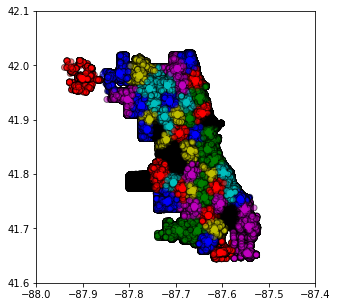

In [ ]:
fig = plt.figure(figsize=(5, 5))
colors = list(map(lambda x: colmap[x+1], labels))

plt.scatter(location['Longitude'], location['Latitude'], color=colors, alpha=0.5, edgecolor='k')

for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])

plt.ylim(41.6, 42.1)
plt.xlim(-88, -87.4)
#plt.show()